In [1]:

import cv2
import numpy as np
import matplotlib.pyplot as plt



In [2]:
# 1. Load the clean image
img_path = r"../image2.jpg"
clean = cv2.imread(img_path, cv2.IMREAD_COLOR)
if clean is None:
    raise FileNotFoundError(f"Could not load {img_path}")



In [3]:


# 2. Add Gaussian noise
mean = 0
sigma = 50
gauss = np.random.normal(mean, sigma, clean.shape).astype(np.float32)
noisy = clean.astype(np.float32) + gauss
noisy = np.clip(noisy, 0, 255).astype(np.uint8)


In [4]:

# 3. Define the averaging kernels we’ll test
kernel_sizes = [2, 8, 16, 32, 128]
denoised = {}
for k in kernel_sizes:
    # cv2.blur does normalized box filter
    denoised[k] = cv2.blur(noisy, (k, k))

# 4. Helper to convert BGR→RGB
def to_rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


<Figure size 1400x600 with 0 Axes>

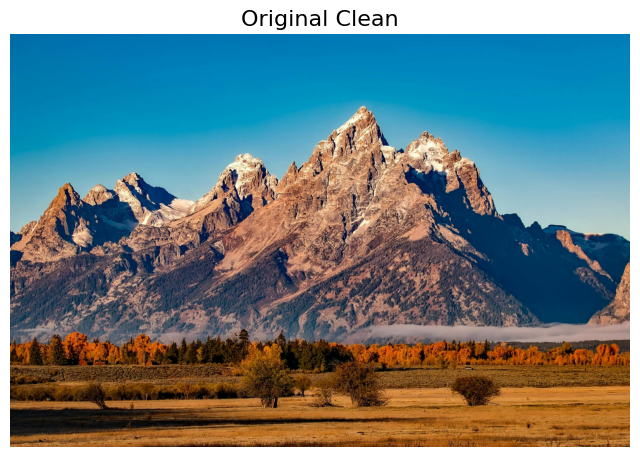

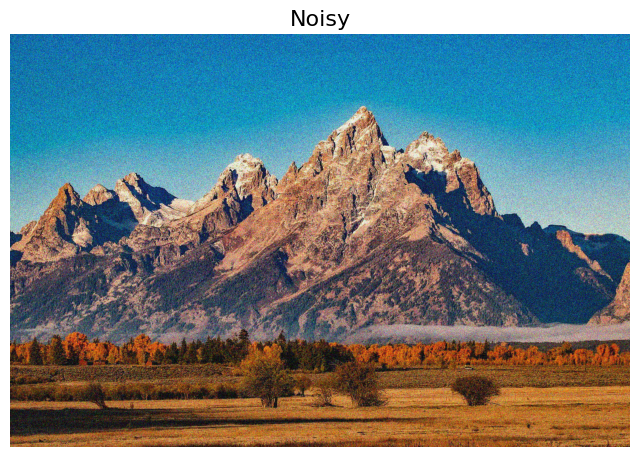

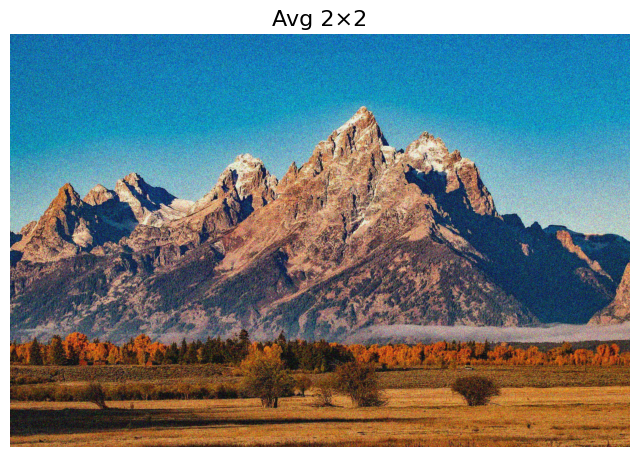

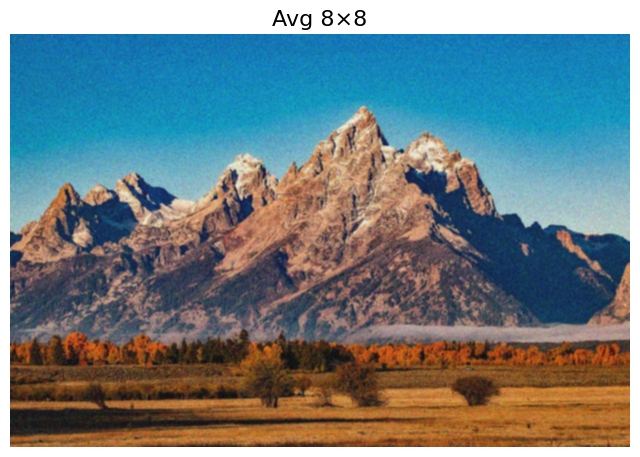

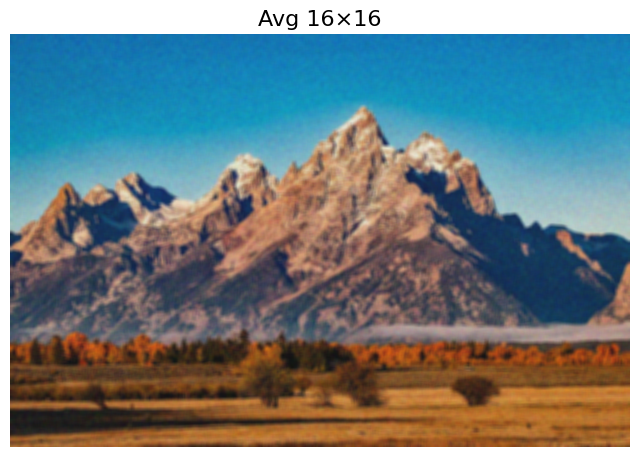

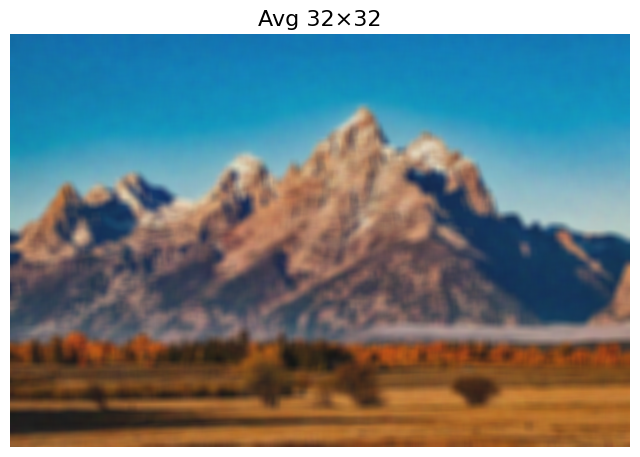

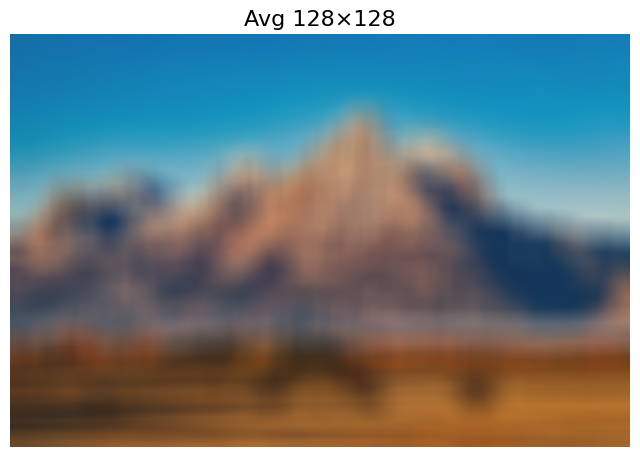

In [6]:

# 5. Display
titles = ["Original Clean", "Noisy"] + [f"Avg {k}×{k}" for k in kernel_sizes]
images = [clean, noisy] + [denoised[k] for k in kernel_sizes]

plt.figure(figsize=(14, 6))
for title, img in zip(titles, images):
    plt.figure(figsize=(8, 8))
    plt.imshow(to_rgb(img))
    plt.title(title, fontsize=16)
    plt.axis("off")
    plt.show()
